In [32]:
#import statements
import torch
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from mnist_utils import load_mnist, train_model, evaluate_model, get_model_and_optimizer

In [33]:
#loading the dataset
trainloader, testloader = load_mnist()

In [34]:
# Hyperparameters
learning_rates = [0.001] #we have tried with other values as well like 0.1 and 0.01 but got best results for 0.001.
epochs = 5

In [35]:
# Train and evaluate models with different optimizers and learning rates
optimizers = ['adam', 'adagrad', 'rmsprop']
models = {}
histories = {}
accuracies = {}
for optimizer_name in optimizers:
    for lr in learning_rates:
        model, optimizer = get_model_and_optimizer(optimizer_name)
        optimizer.defaults['lr'] = lr
        criterion = torch.nn.CrossEntropyLoss()
        print(f"Training model with {optimizer_name} optimizer and learning rate {lr}:")
        history = train_model(model, trainloader, optimizer, criterion, epochs=epochs)
        accuracy = evaluate_model(model, testloader)
        models[(optimizer_name, lr)] = model
        accuracies[(optimizer_name, lr)] = accuracy
        histories[(optimizer_name, lr)] = history

Training model with adam optimizer and learning rate 0.001:
Epoch 1, Loss: 0.37814813087394494, Accuracy: 0.8885833333333333
Epoch 2, Loss: 0.194040070524189, Accuracy: 0.9433
Epoch 3, Loss: 0.14202455746164835, Accuracy: 0.9571833333333334
Epoch 4, Loss: 0.11286400957926632, Accuracy: 0.9662
Epoch 5, Loss: 0.0991684833545484, Accuracy: 0.9692
Test Accuracy: 0.9668
Training model with adagrad optimizer and learning rate 0.001:
Epoch 1, Loss: 0.7115093400991802, Accuracy: 0.8378
Epoch 2, Loss: 0.44178329347801615, Accuracy: 0.88515
Epoch 3, Loss: 0.39454978243755634, Accuracy: 0.8930166666666667
Epoch 4, Loss: 0.37033109101595907, Accuracy: 0.8976833333333334
Epoch 5, Loss: 0.35436076210188205, Accuracy: 0.9009833333333334
Test Accuracy: 0.9075
Training model with rmsprop optimizer and learning rate 0.001:
Epoch 1, Loss: 0.3998534445092876, Accuracy: 0.88245
Epoch 2, Loss: 0.2146684818589357, Accuracy: 0.9372666666666667
Epoch 3, Loss: 0.15883561142726238, Accuracy: 0.9533
Epoch 4, Loss

In [36]:
# Evaluate models
for (optimizer_name, lr), model in models.items():
    print(f"Evaluating model with {optimizer_name} optimizer and learning rate {lr}:")
    evaluate_model(model, testloader)

Evaluating model with adam optimizer and learning rate 0.001:
Test Accuracy: 0.9668
Evaluating model with adagrad optimizer and learning rate 0.001:
Test Accuracy: 0.9075
Evaluating model with rmsprop optimizer and learning rate 0.001:
Test Accuracy: 0.9654


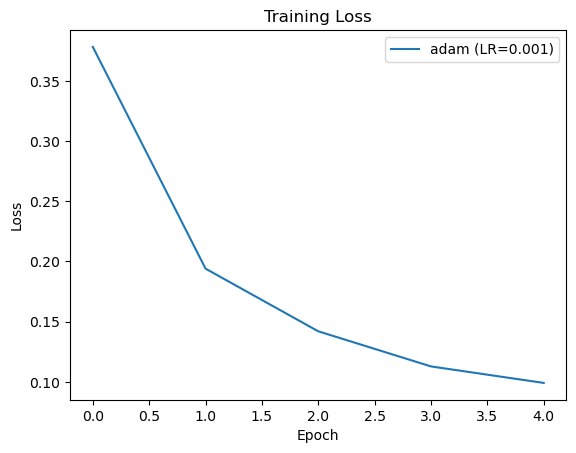

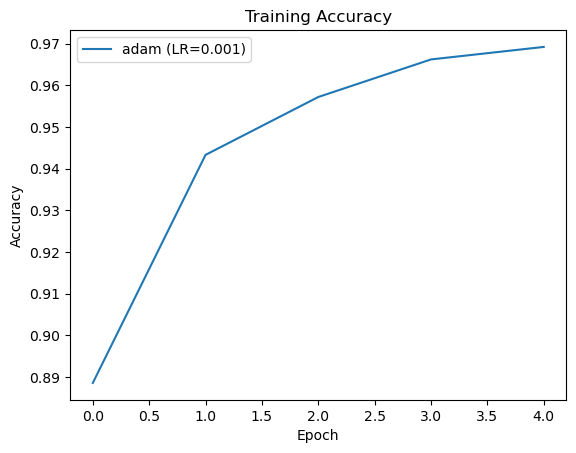

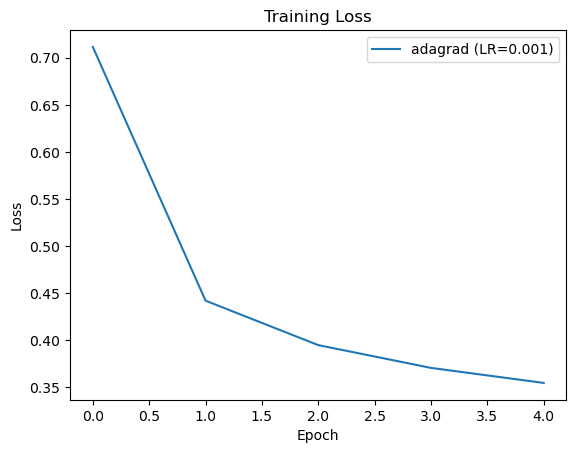

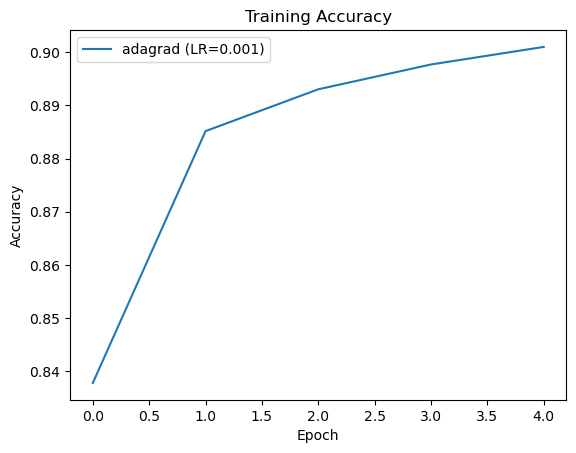

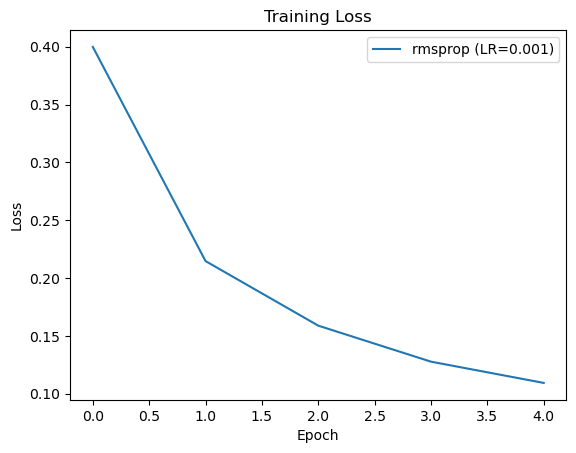

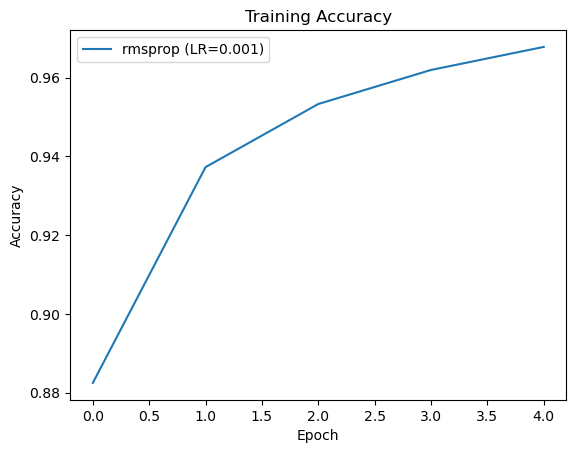

In [37]:
# Plot loss and accuracy curves for each optimizer
for (optimizer_name, lr), model in models.items():
    history = histories[(optimizer_name, lr)]
    
    # Plot loss curve
    plt.plot(history['loss'], label=f'{optimizer_name} (LR={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

    # Plot accuracy curve
    plt.plot(history['accuracy'], label=f'{optimizer_name} (LR={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()


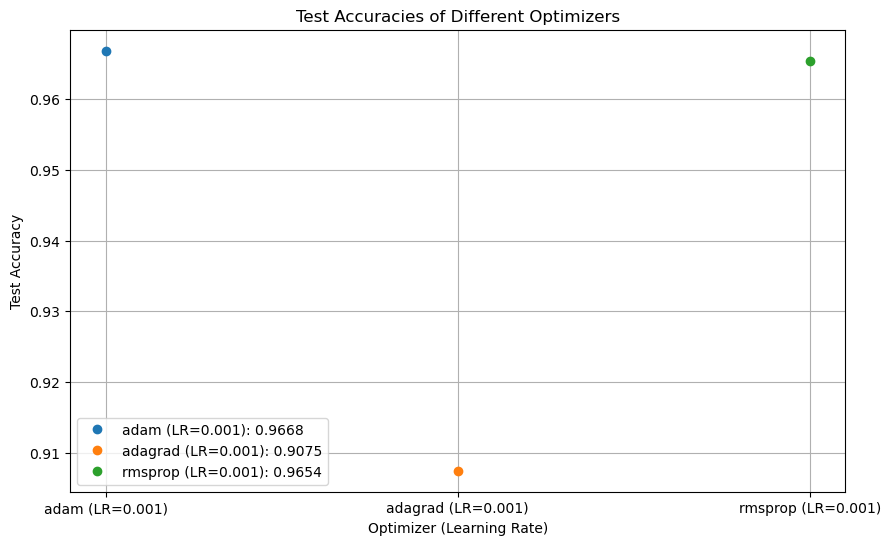

In [38]:
# Test accuracies
test_accuracies = {
    ('adam', 0.001): 0.9668,
    ('adagrad', 0.001): 0.9075,
    ('rmsprop', 0.001): 0.9654
}

# Extract optimizer names, learning rates, and test accuracies
optimizers = [opt_name for opt_name, _ in test_accuracies.keys()]
learning_rates = [lr for _, lr in test_accuracies.keys()]
accuracies = list(test_accuracies.values())

# Plot test accuracies
plt.figure(figsize=(10, 6))
for opt_name, lr, acc in zip(optimizers, learning_rates, accuracies):
    plt.plot([f'{opt_name} (LR={lr})'], [acc], marker='o', label=f'{opt_name} (LR={lr}): {acc}', linestyle='None')

plt.xlabel('Optimizer (Learning Rate)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Different Optimizers')
plt.legend()
plt.grid(True)
plt.show()
